## 2.18. Changed sigma's effect on mean

[1] "mean"              "0,997534796680154"
[1] "mean"             "1,00401879974737"
[1] "mean"             "1,00949337288893"


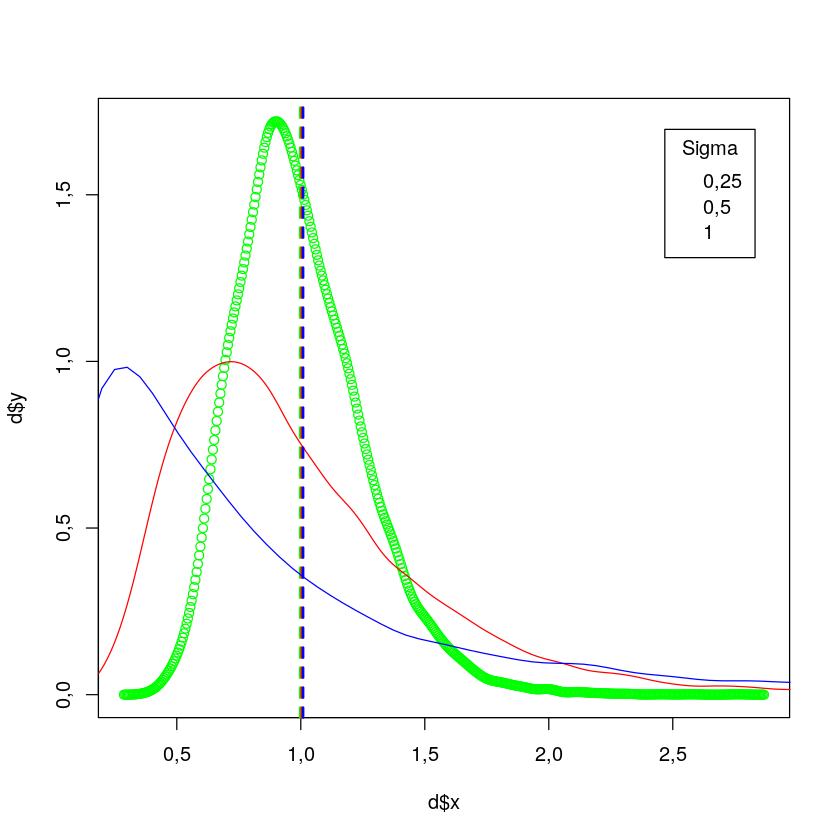

In [44]:
sigmas <- c(.25, .5, 1)
xsi <- 1
m <- 1e4
colors <- c("green", "red", "blue", "magenta ", 'yellow')

counter = 1
for (sigma in sigmas){
    eps = rnorm(m)
    X = xsi*exp(-sigma^2/2. + sigma*eps)
    mean = mean(X)
    print(c('mean', mean))


    d = density(X)
    if (sigma == .25){
        plot(d$x, d$y, col=colors[counter])
        abline(v = mean, lty=2, lwd=2, col=colors[counter])

    }
    else{
        lines(d$x, d$y, col=colors[counter])
        abline(v = mean, lty=2, lwd=2, col=colors[counter])    
        }
    
    counter = counter +1
}
legend("topright", inset=.05, title="Sigma", legend=sigmas, col = colors);